In [ ]:
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.optimizers import SGD
from keras_visualizer import visualizer 
import itertools
from sklearn.metrics import classification_report, confusion_matrix
from google.colab.patches import cv2_imshow
from tensorflow.keras import regularizers

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def importData(fileName):
  df = pd.read_csv(fileName)
  df = np.array(df)

  #normalização dos dados
  X = df[:, 1 : ]
  X = X.astype('float32')
  X = X / 255

  #convertendo para um vetor de saída com 10 dimensões
  y = df[:, : 1]
  y = keras.utils.to_categorical(y, 10)

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)
  
  return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = importData('/content/drive/MyDrive/train.csv')

In [ ]:
def TrainModel(model, epochs, batch_size):
  history = model.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(X_val, y_val))
  return model, history

In [ ]:
resultados = []

In [ ]:
def train(momentum=0, epochs=10, batch_size=25):
  model = keras.Sequential(
      [
          keras.Input(shape=(784,)),
          layers.Dense(10, activation="softmax"),
      ]
  )

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.01, momentum=momentum, name="SGD"),
                metrics=['accuracy'])

  model, history = TrainModel(model, epochs, batch_size)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

10 epocas, somente 1 camada softmax


Epoch 1/10
1176/1176 [==============================] - 4s 3ms/step - loss: 0.9159 - accuracy: 0.7836 - val_loss: 0.5818 - val_accuracy: 0.8578
Epoch 2/10
1176/1176 [==============================] - 5s 5ms/step - loss: 0.5135 - accuracy: 0.8720 - val_loss: 0.4691 - val_accuracy: 0.8765
Epoch 3/10
1176/1176 [==============================] - 5s 4ms/step - loss: 0.4421 - accuracy: 0.8851 - val_loss: 0.4221 - val_accuracy: 0.8843
Epoch 4/10
1176/1176 [==============================] - 5s 4ms/step - loss: 0.4067 - accuracy: 0.8922 - val_loss: 0.3952 - val_accuracy: 0.8892
Epoch 5/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3847 - accuracy: 0.8969 - val_loss: 0.3774 - val_accuracy: 0.8941
Epoch 6/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3690 - accuracy: 0.8998 - val_loss: 0.3646 - val_accuracy: 0.8963
Epoch 7/10
1176/1176 [==============================] - 3s 2ms/step - loss: 0.3573 - accuracy: 0.9030 - val_loss: 0.3544 - val_accuracy:

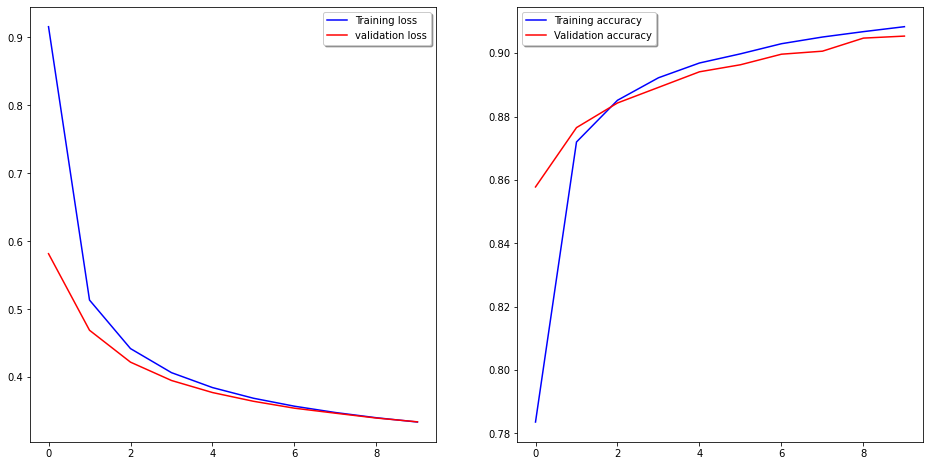

In [ ]:
model, history = train()

In [ ]:
model.save('/content/drive/MyDrive/modelo1-10')
resultados.append([model, history])

In [ ]:
def train(momentum=0, epochs=10, batch_size=25):
  model = keras.Sequential(
      [
          keras.Input(shape=(784,)),
          layers.Dense(100, activation="relu"),
          layers.Dense(10, activation="softmax"),
      ]
  )

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.01, momentum=momentum, name="SGD"),
                metrics=['accuracy'])

  model, history = TrainModel(model, epochs, batch_size)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

uma camada softmax e uma camada com 100 perceptrons relu

Epoch 1/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.7927 - accuracy: 0.8013 - val_loss: 0.4398 - val_accuracy: 0.8811
Epoch 2/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3844 - accuracy: 0.8952 - val_loss: 0.3505 - val_accuracy: 0.8995
Epoch 3/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3253 - accuracy: 0.9098 - val_loss: 0.3087 - val_accuracy: 0.9114
Epoch 4/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2929 - accuracy: 0.9193 - val_loss: 0.2853 - val_accuracy: 0.9190
Epoch 5/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2699 - accuracy: 0.9247 - val_loss: 0.2660 - val_accuracy: 0.9267
Epoch 6/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2509 - accuracy: 0.9297 - val_loss: 0.2518 - val_accuracy: 0.9287
Epoch 7/10
1176/1176 [==============================] - 3s 2ms/step - loss: 0.2358 - accuracy: 0.9338 - val_loss: 0.2376 - val_accuracy:

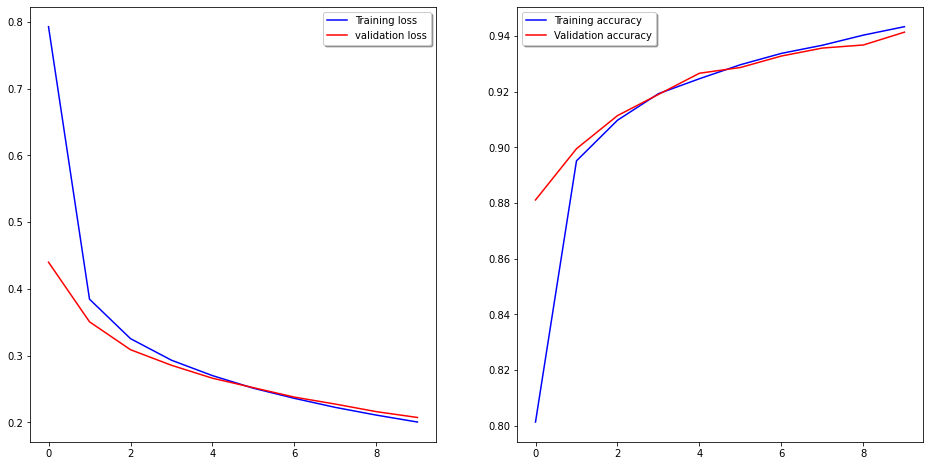

In [ ]:
model, history = train(epochs=10)

In [ ]:
model.save('/content/drive/MyDrive/modelo2-10')
resultados.append([model, history])

Epoch 1/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.8332 - accuracy: 0.7907 - val_loss: 0.4438 - val_accuracy: 0.8816
Epoch 2/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3879 - accuracy: 0.8938 - val_loss: 0.3488 - val_accuracy: 0.8989
Epoch 3/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3264 - accuracy: 0.9098 - val_loss: 0.3087 - val_accuracy: 0.9105
Epoch 4/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2937 - accuracy: 0.9178 - val_loss: 0.2844 - val_accuracy: 0.9192
Epoch 5/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2701 - accuracy: 0.9239 - val_loss: 0.2652 - val_accuracy: 0.9248
Epoch 6/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2513 - accuracy: 0.9299 - val_loss: 0.2486 - val_accuracy: 0.9276
Epoch 7/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2360 - accuracy: 0.9334 - val_loss: 0.2373 - val_ac

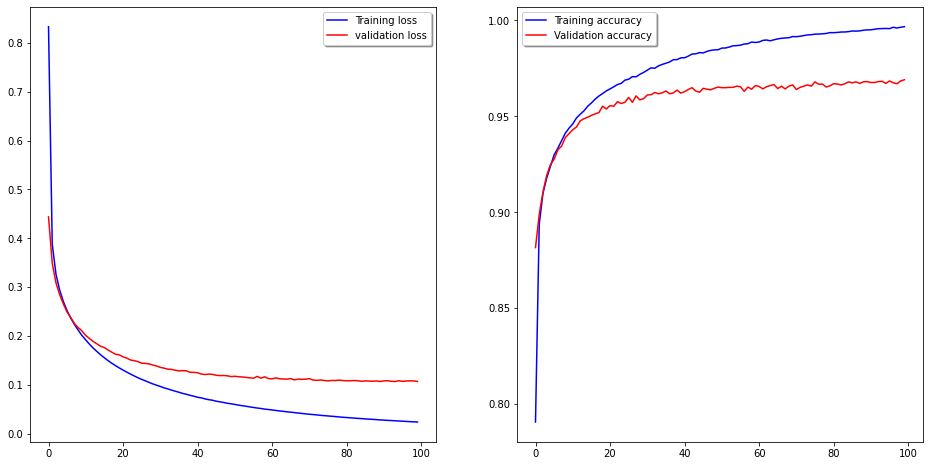

In [ ]:
model, history = train(epochs=100)

In [ ]:
model.save('/content/drive/MyDrive/modelo2-100')
resultados.append([model, history])

aumentando a camada interior para 512 perceptrons relu

In [ ]:
def train(momentum=0, epochs=10, batch_size=25):
  model = keras.Sequential(
      [
          keras.Input(shape=(784,)),
          layers.Dense(512, activation="relu"),
          layers.Dense(10, activation="softmax"),
      ]
  )

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.01, momentum=momentum, name="SGD"),
                metrics=['accuracy'])

  model, history = TrainModel(model, epochs, batch_size)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.7361 - accuracy: 0.8292 - val_loss: 0.4127 - val_accuracy: 0.8892
Epoch 2/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3626 - accuracy: 0.9019 - val_loss: 0.3277 - val_accuracy: 0.9083
Epoch 3/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3069 - accuracy: 0.9163 - val_loss: 0.2894 - val_accuracy: 0.9187
Epoch 4/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2754 - accuracy: 0.9233 - val_loss: 0.2677 - val_accuracy: 0.9241
Epoch 5/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2526 - accuracy: 0.9296 - val_loss: 0.2483 - val_accuracy: 0.9308
Epoch 6/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2344 - accuracy: 0.9353 - val_loss: 0.2333 - val_accuracy: 0.9349
Epoch 7/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2187 - accuracy: 0.9400 - val_loss: 0.2216 - val_ac

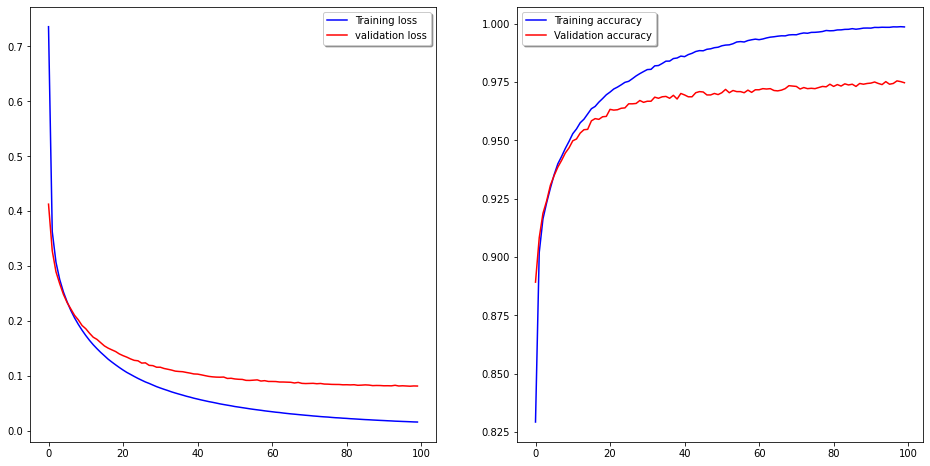

In [ ]:
model, history = train(epochs=100)

In [ ]:
model.save('/content/drive/MyDrive/modelo3-100')
resultados.append([model, history])

muito melhor com 2 camadas intermediarias

In [ ]:
def train(momentum=0, epochs=10, batch_size=25):
  model = keras.Sequential(
      [
          keras.Input(shape=(784,)),
          layers.Dense(512, activation="relu"),
          layers.Dense(512, activation="relu"),
          layers.Dense(10, activation="softmax"),
      ]
  )

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.01, momentum=momentum, name="SGD"),
                metrics=['accuracy'])

  model, history = TrainModel(model, epochs, batch_size)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.7267 - accuracy: 0.8195 - val_loss: 0.3587 - val_accuracy: 0.9008
Epoch 2/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3151 - accuracy: 0.9118 - val_loss: 0.2824 - val_accuracy: 0.9200
Epoch 3/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.2580 - accuracy: 0.9268 - val_loss: 0.2415 - val_accuracy: 0.9300
Epoch 4/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.2234 - accuracy: 0.9367 - val_loss: 0.2173 - val_accuracy: 0.9348
Epoch 5/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.1973 - accuracy: 0.9428 - val_loss: 0.1954 - val_accuracy: 0.9414
Epoch 6/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.1764 - accuracy: 0.9497 - val_loss: 0.1808 - val_accuracy: 0.9460
Epoch 7/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.1583 - accuracy: 0.9555 - val_loss: 0.1636 - val_ac

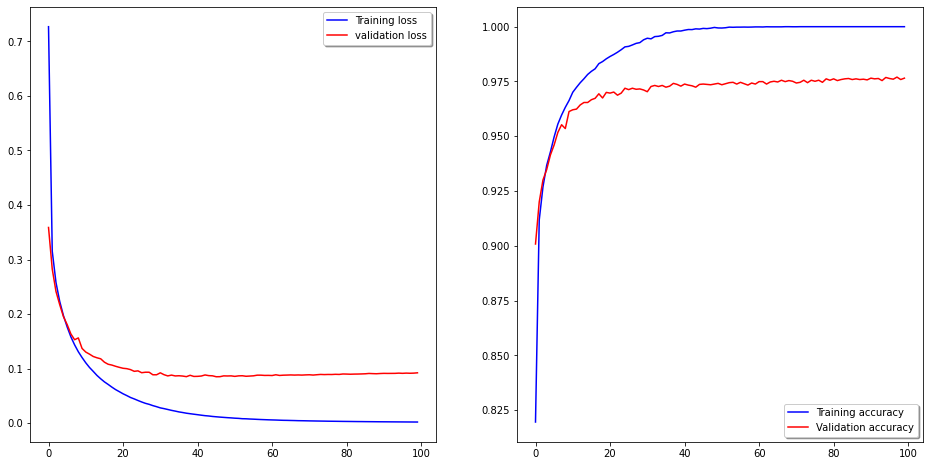

In [ ]:
model, history = train(epochs=100)

In [ ]:
model.save('/content/drive/MyDrive/modelo4-100')
resultados.append([model, history])

In [ ]:
def train(momentum=0, epochs=10, batch_size=25):
  model = keras.Sequential(
      [
          keras.Input(shape=(784,)),
          layers.Dense(1024, activation="relu"),
          layers.Dense(1024, activation="relu"),
          layers.Dense(10, activation="softmax"),
      ]
  )

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.01, momentum=momentum, name="SGD"),
                metrics=['accuracy'])

  model, history = TrainModel(model, epochs, batch_size)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.6627 - accuracy: 0.8393 - val_loss: 0.3411 - val_accuracy: 0.9038
Epoch 2/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.3033 - accuracy: 0.9145 - val_loss: 0.2724 - val_accuracy: 0.9224
Epoch 3/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.2499 - accuracy: 0.9288 - val_loss: 0.2382 - val_accuracy: 0.9305
Epoch 4/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.2156 - accuracy: 0.9385 - val_loss: 0.2175 - val_accuracy: 0.9351
Epoch 5/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.1907 - accuracy: 0.9459 - val_loss: 0.1956 - val_accuracy: 0.9437
Epoch 6/100
1176/1176 [==============================] - 4s 4ms/step - loss: 0.1692 - accuracy: 0.9521 - val_loss: 0.1745 - val_accuracy: 0.9490
Epoch 7/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.1514 - accuracy: 0.9578 - val_loss: 0.1636 - val_ac

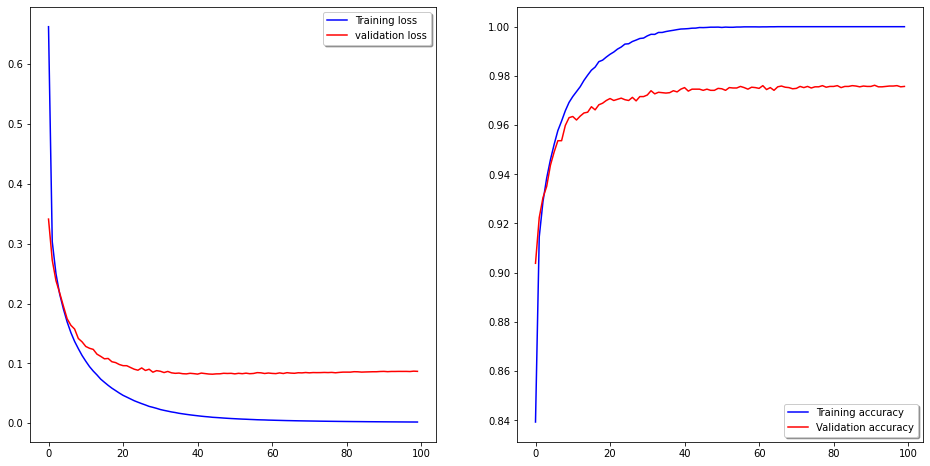

In [ ]:
model, history = train(epochs= 100)

In [ ]:
model.save('/content/drive/MyDrive/modelo5-100')
resultados.append([model, history])

In [ ]:
def train(momentum=0, epochs=10, batch_size=25):
  model = keras.Sequential(
      [
          keras.Input(shape=(784,)),
          layers.Dense(1024, activation="relu"),
          layers.Dense(1024, activation="relu", activity_regularizer=regularizers.L2(0.01)),
          layers.Dense(10, activation="softmax"),
      ]
  )

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.01, momentum=momentum, name="SGD"),
                metrics=['accuracy'])

  model, history = TrainModel(model, epochs, batch_size)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/100
1176/1176 [==============================] - 4s 3ms/step - loss: 1.0655 - accuracy: 0.8353 - val_loss: 0.6723 - val_accuracy: 0.9002
Epoch 2/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.5784 - accuracy: 0.9154 - val_loss: 0.5135 - val_accuracy: 0.9232
Epoch 3/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.4658 - accuracy: 0.9319 - val_loss: 0.4352 - val_accuracy: 0.9335
Epoch 4/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.4017 - accuracy: 0.9414 - val_loss: 0.3861 - val_accuracy: 0.9408
Epoch 5/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3569 - accuracy: 0.9498 - val_loss: 0.3497 - val_accuracy: 0.9484
Epoch 6/100
1176/1176 [==============================] - 3s 3ms/step - loss: 0.3225 - accuracy: 0.9547 - val_loss: 0.3224 - val_accuracy: 0.9529
Epoch 7/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.2952 - accuracy: 0.9594 - val_loss: 0.3001 - val_ac

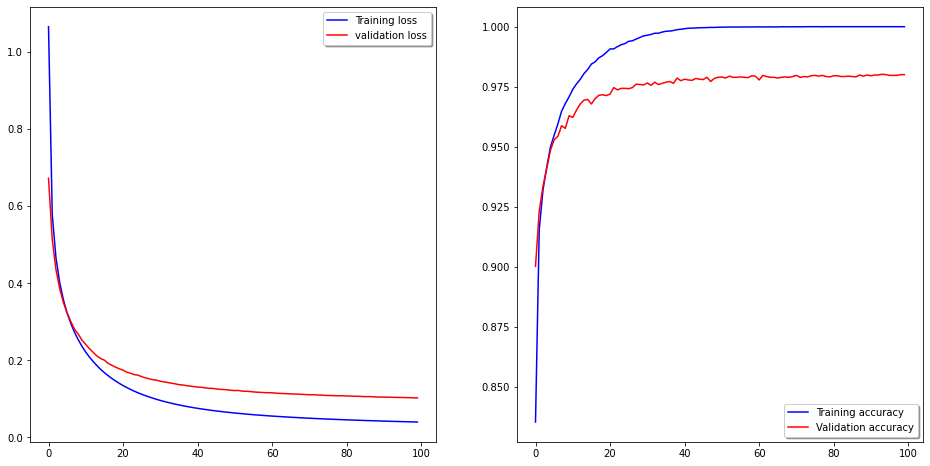

In [ ]:
model, history = train(epochs= 100)

In [ ]:
model.save('/content/drive/MyDrive/modelo6-100')
resultados.append([model, history])

In [ ]:
def train(momentum=0, epochs=10, batch_size=25):
  model = keras.Sequential(
      [
          keras.Input(shape=(784,)),
          layers.Dense(1024, activation="relu"),
          layers.Dense(1024, activation="relu", activity_regularizer=regularizers.L2(0.01)),
          layers.Dense(10, activation="softmax"),
      ]
  )

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.01, momentum = 0.9, name="SGD"),
                metrics=['accuracy'])

  model, history = TrainModel(model, epochs, batch_size)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.4827 - accuracy: 0.9178 - val_loss: 0.2882 - val_accuracy: 0.9502
Epoch 2/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.2134 - accuracy: 0.9685 - val_loss: 0.1925 - val_accuracy: 0.9690
Epoch 3/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.1472 - accuracy: 0.9819 - val_loss: 0.1559 - val_accuracy: 0.9757
Epoch 4/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.1092 - accuracy: 0.9901 - val_loss: 0.1396 - val_accuracy: 0.9776
Epoch 5/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.0857 - accuracy: 0.9950 - val_loss: 0.1236 - val_accuracy: 0.9787
Epoch 6/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.0695 - accuracy: 0.9976 - val_loss: 0.1165 - val_accuracy: 0.9795
Epoch 7/100
1176/1176 [==============================] - 4s 3ms/step - loss: 0.0582 - accuracy: 0.9989 - val_loss: 0.1052 - val_ac

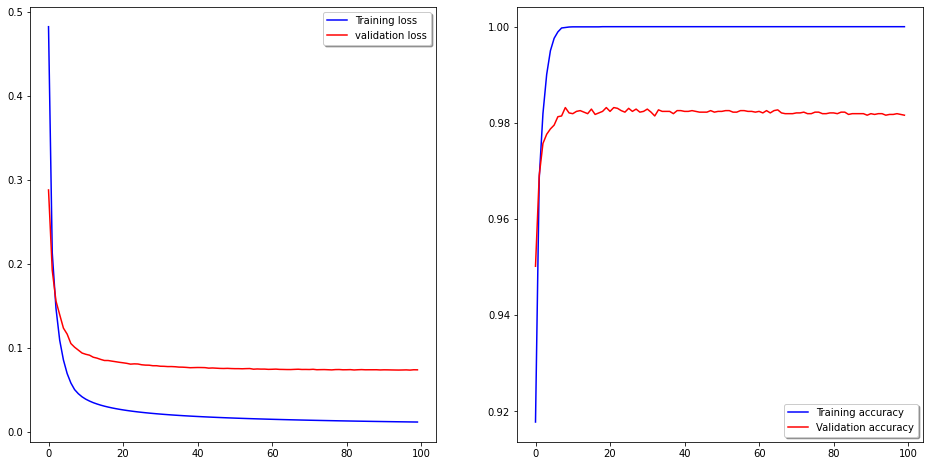

In [ ]:
model, history = train(epochs= 100)

In [ ]:
model.save('/content/drive/MyDrive/modelo7-100')
resultados.append([model, history])

In [ ]:
print(len(resultados)) 

8


In [ ]:
acuraciaFinal = []
for i in range(len(resultados)):
  acuraciaFinal.append(resultados[i][1])

In [ ]:
colors = ['r', 'g', 'b', 'orange', 'yellow', 'black']

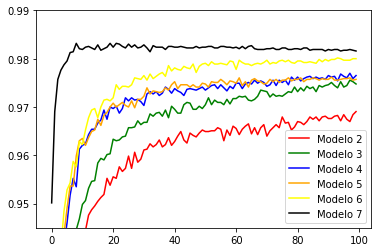

In [ ]:
for i in range(len(acuraciaFinal[2:])):
  plt.plot(acuraciaFinal[i + 2].history['val_accuracy'], color=colors[i], label=("Modelo " + str(i+2)))

plt.rcParams["legend.loc"] = 'lower right'
plt.ylim((0.945, 0.99))
plt.legend()
plt.show()

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


In [ ]:
acuraciaFinalMediaMovel = []
for i in range(len(acuraciaFinal[2:])):
  acuraciaFinalMediaMovel.append(moving_average(acuraciaFinal[i+2].history['val_accuracy'], 15))

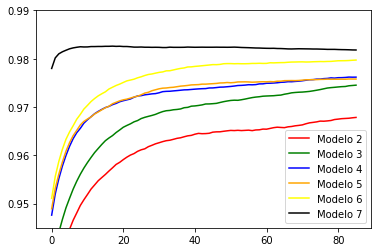

In [ ]:
for i in range(len(acuraciaFinalMediaMovel)):
  plt.plot(acuraciaFinalMediaMovel[i], color=colors[i], label=("Modelo " + str(i + 2)))

plt.rcParams["legend.loc"] = 'lower right'
plt.legend()
plt.ylim((0.945, 0.99))
plt.show()

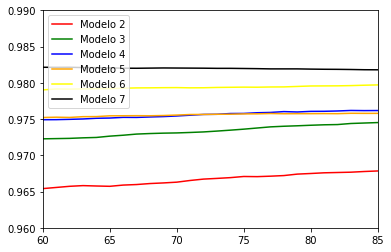

In [ ]:
for i in range(len(acuraciaFinalMediaMovel)):
  plt.plot(acuraciaFinalMediaMovel[i], color=colors[i], label=("Modelo " + str(i + 2)))

plt.rcParams["legend.loc"] = 'upper left'
plt.legend()
plt.xlim((60, 85))
plt.ylim((0.96, 0.99))
plt.show()